In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/tmp/ipykernel_83/1156681991.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
stations = pd.read_csv('./stations_with_hierarchical_cluster_4_without_pca.csv')

In [3]:
stations_gdf = GeoDataFrame(
    stations,
    crs='epsg:4326',
    geometry=[Point(xy) for xy in zip(stations.lon, stations.lat)])


In [4]:
stations_gdf.head()

,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,...,intersection_density_km,edge_density_km,street_density_km,circuity_avg,self_loop_proportion,clean_intersection_count,clean_intersection_density_km,station_name_roman,cluster_number,geometry
0,1130506,1130506,東所沢,NaN,NaN,11305,11,359-0022,所沢市本郷１丁目,139.513878,...,200.261250,44092.478846,22317.256266,1.033771,0.002147,366.0,165.080220,NaN,3,POINT (139.51388 35.79461)
1,1130507,1130507,新座,NaN,NaN,11305,11,352-0011,新座市野火止５丁目,139.556328,...,176.365231,36061.846385,18873.557190,1.096247,0.003834,277.0,115.765803,NaN,3,POINT (139.55633 35.80381)
2,1130508,1130508,北朝霞,NaN,NaN,11305,11,351-0033,朝霞市浜崎１丁目,139.587322,...,220.936925,43252.257861,22209.618128,1.058486,0.001174,335.0,134.570673,NaN,1,POINT (139.58732 35.81547)
3,1130509,1130509,西浦和,NaN,NaN,11305,11,338-0837,さいたま市桜区田島５丁目,139.627707,...,220.477262,41545.071412,21726.569992,1.042005,0.000000,301.0,125.451145,NaN,1,POINT (139.62771 35.84414)
4,1130510,1130510,武蔵浦和,NaN,NaN,11305,11,336-0021,さいたま市南区別所七丁目12-1,139.647974,...,246.320245,45257.298857,23983.223340,1.010927,0.000000,418.0,166.874979,NaN,1,POINT (139.64797 35.84605)


In [5]:
upa = gpd.read_file('../data/upa_kanto.geojson')

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [6]:
upa[upa['prefec_cd'] == 13].head(-10)

,prefec_cd,area_cd,layer_no,geometry
1391,13,13101,1,"POLYGON ((139.73001 35.68538, 139.73000 35.685..."
1392,13,13102,1,"POLYGON ((139.75432 35.66990, 139.75446 35.669..."
1393,13,13102,1,"POLYGON ((139.76741 35.65341, 139.76724 35.655..."
1394,13,13102,1,"POLYGON ((139.76949 35.64927, 139.76976 35.649..."
1395,13,13102,1,"POLYGON ((139.77229 35.65902, 139.77229 35.659..."
...,...,...,...,...
1549,13,13303,2,"POLYGON ((139.33839 35.78154, 139.33832 35.781..."
1550,13,13303,2,"POLYGON ((139.35719 35.78288, 139.35718 35.782..."
1551,13,13305,1,"POLYGON ((139.22700 35.74569, 139.22653 35.746..."
1552,13,13305,2,"POLYGON ((139.16304 35.77824, 139.16308 35.778..."


In [7]:
upa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [8]:
land_use = gpd.read_file('../data/land_use_kanto.geojson')

In [9]:
land_use.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [10]:
stations_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<AxesSubplot: >

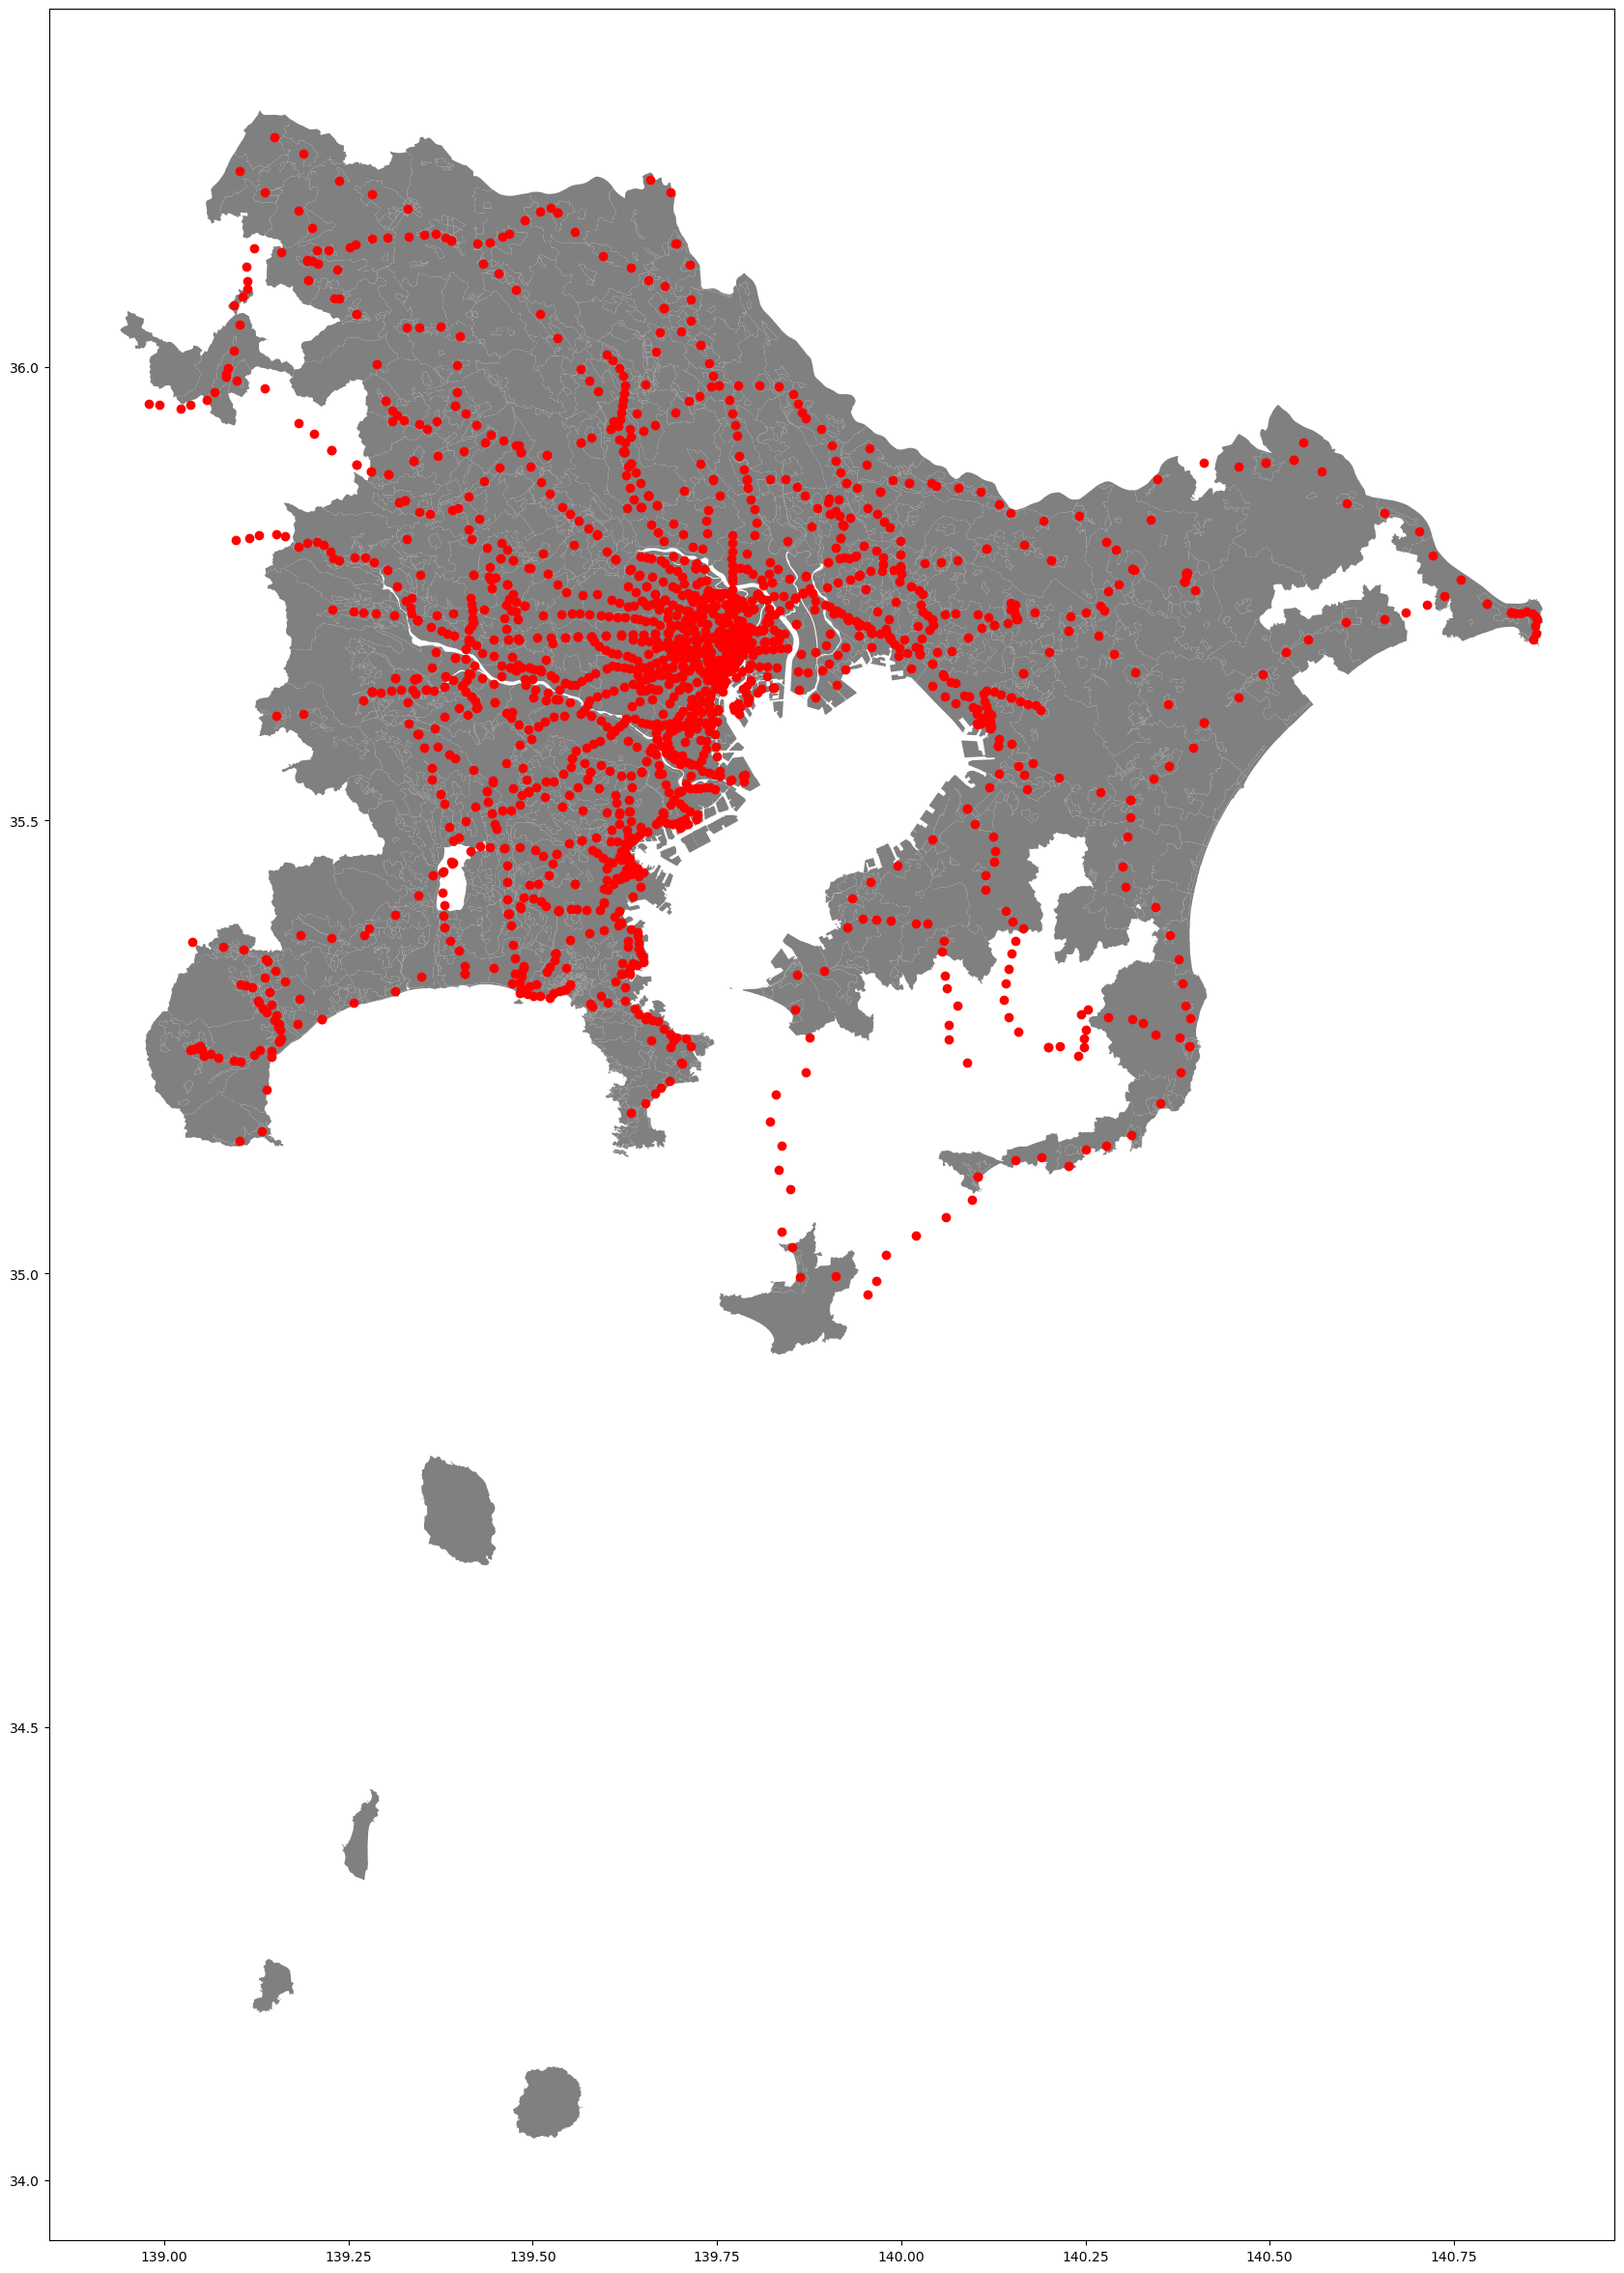

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(30, 30))
upa[(upa['prefec_cd'] != 13) | (upa['area_cd'] < 13400)].plot(ax = ax, color='gray')
stations_gdf.plot(ax = ax, color='red')


In [12]:
def get_upa(x):
    target_upa = upa[upa.contains(x.geometry)]
    if (len(target_upa) > 0):
        return int(target_upa.iloc[0].layer_no)
    else:
        return None

In [13]:
stations_gdf['upa'] = stations_gdf.apply(get_upa, axis=1)

In [14]:
stations_gdf['upa'].value_counts()

1.0    1779
3.0      74
2.0      66
4.0      39
Name: upa, dtype: int64

In [15]:
def get_land_use(x):
    target_area = land_use[land_use.contains(x.geometry)]
    if (len(target_area) > 0):
        return int(target_area.iloc[0].A29_004)
    else:
        return None

In [16]:
land_use.head()

,A29_001,A29_002,A29_003,A29_004,A29_005,A29_006,A29_007,A29_008,A29_009,A29_010,geometry
0,12208,千葉県,野田市,6,第二種住居地域,60,200,野田市,2010,None,"POLYGON ((139.88982 35.91527, 139.88966 35.915..."
1,12208,千葉県,野田市,1,第一種低層住居専用地域,50,100,野田市,2010,None,"POLYGON ((139.88839 35.91803, 139.88679 35.917..."
2,12208,千葉県,野田市,3,第一種中高層住居専用地域,60,200,野田市,2010,None,"POLYGON ((139.91568 35.91987, 139.91539 35.919..."
3,12208,千葉県,野田市,3,第一種中高層住居専用地域,60,200,野田市,2010,None,"POLYGON ((139.88792 35.92221, 139.88829 35.921..."
4,12208,千葉県,野田市,6,第二種住居地域,60,200,野田市,2010,None,"POLYGON ((139.88524 35.92283, 139.88366 35.921..."


In [17]:
stations_gdf['land_use'] = stations_gdf.apply(get_land_use, axis=1)

In [18]:
stations_gdf['land_use'].value_counts()

9.0     891
8.0     382
5.0     256
10.0    126
1.0      50
3.0      50
6.0      38
11.0     20
12.0     13
4.0      12
7.0      12
2.0       5
Name: land_use, dtype: int64

In [19]:
def to_group_number(x):
    number = x['cluster_number']
    if number == 2:
        return 1
    elif number == 1:
        return 2
    elif number == 3:
        return 3
    else:
        return 4
    


In [20]:
stations_gdf['cluster_number'].value_counts()

3    652
1    617
2    419
4    343
Name: cluster_number, dtype: int64

In [21]:
stations_gdf

,station_cd,station_g_cd,station_name,station_name_k,station_name_r,line_cd,pref_cd,post,address,lon,...,street_density_km,circuity_avg,self_loop_proportion,clean_intersection_count,clean_intersection_density_km,station_name_roman,cluster_number,geometry,upa,land_use
0,1130506,1130506,東所沢,NaN,NaN,11305,11,359-0022,所沢市本郷１丁目,139.513878,...,22317.256266,1.033771,0.002147,366.0,165.080220,NaN,3,POINT (139.51388 35.79461),1.0,8.0
1,1130507,1130507,新座,NaN,NaN,11305,11,352-0011,新座市野火止５丁目,139.556328,...,18873.557190,1.096247,0.003834,277.0,115.765803,NaN,3,POINT (139.55633 35.80381),1.0,5.0
2,1130508,1130508,北朝霞,NaN,NaN,11305,11,351-0033,朝霞市浜崎１丁目,139.587322,...,22209.618128,1.058486,0.001174,335.0,134.570673,NaN,1,POINT (139.58732 35.81547),1.0,9.0
3,1130509,1130509,西浦和,NaN,NaN,11305,11,338-0837,さいたま市桜区田島５丁目,139.627707,...,21726.569992,1.042005,0.000000,301.0,125.451145,NaN,1,POINT (139.62771 35.84414),1.0,5.0
4,1130510,1130510,武蔵浦和,NaN,NaN,11305,11,336-0021,さいたま市南区別所七丁目12-1,139.647974,...,23983.223340,1.010927,0.000000,418.0,166.874979,NaN,1,POINT (139.64797 35.84605),1.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,9934402,9934402,公園下,NaN,NaN,99344,14,250-0500,神奈川県足柄下郡箱根町,139.045639,...,12059.114397,1.122440,0.000000,108.0,57.337042,kouenshita,4,POINT (139.04564 35.24994),3.0,5.0
2027,9934403,9934403,公園上,NaN,NaN,99344,14,250-0500,神奈川県足柄下郡箱根町,139.043167,...,11932.300758,1.170265,0.000000,93.0,50.391056,kouenue,4,POINT (139.04317 35.24908),3.0,5.0
2028,9934404,9934404,中強羅,NaN,NaN,99344,14,250-0500,神奈川県足柄下郡箱根町,139.040556,...,10750.215902,1.169691,0.000000,82.0,46.491331,nakakyoura,4,POINT (139.04056 35.24817),3.0,5.0
2029,9934405,9934405,上強羅,NaN,NaN,99344,14,250-0500,神奈川県足柄下郡箱根町,139.038056,...,10836.573154,1.182520,0.007463,79.0,47.103452,uekyoura,4,POINT (139.03806 35.24731),3.0,5.0


In [22]:
stations_gdf['group_number'] = stations_gdf.apply(to_group_number, axis=1)

In [23]:
stations_gdf.to_csv('stations_with_cluster_and_land_use.csv', index=False)

In [24]:
stations_1 = stations[stations['cluster_number'] == 2] # group1 
stations_2 = stations[stations['cluster_number'] == 1] # group2
stations_3 = stations[stations['cluster_number'] == 3] # group3
stations_4 = stations[stations['cluster_number'] == 4] # group4



In [25]:
def hist_feature(feature_name):
    target_names = stations['cluster_number'].unique()
    plt.figure()


    for target in target_names:
        target_stations = stations_gdf[stations_gdf['cluster_number'] == target]
        plt.hist(target_stations[feature_name], bins=4, alpha=0.6, label=labels[target], color=colors[target])

    plt.title(feature_name)
    plt.legend()
    plt.savefig(f"{feature_name}_hist.png", bbox_inches = "tight")

labels = {2: 'first dense area', 1: 'second dense area', 3: 'third dense area', 4: 'forth dense area'}
colors = {2: 'green', 1: 'red', 3: 'pink', 4: 'blue'}

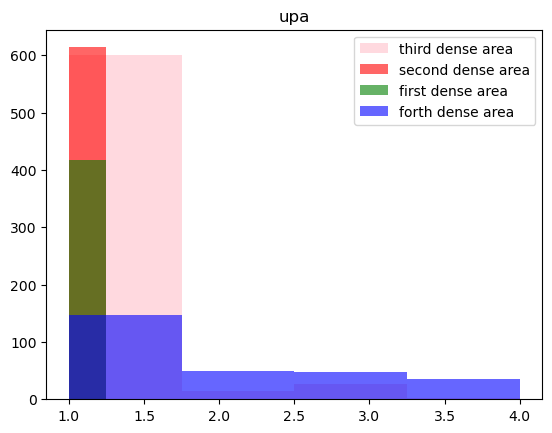

In [26]:
hist_feature('upa')

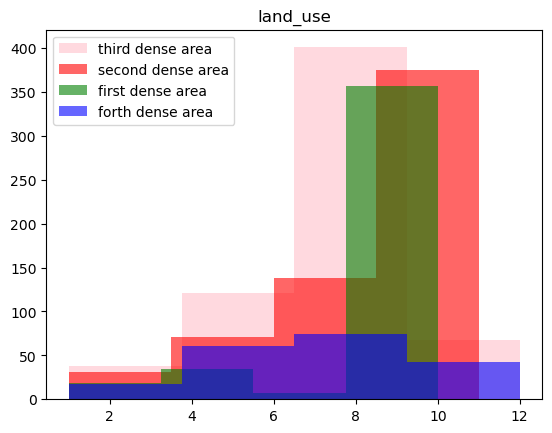

In [27]:
hist_feature('land_use')

<AxesSubplot: >

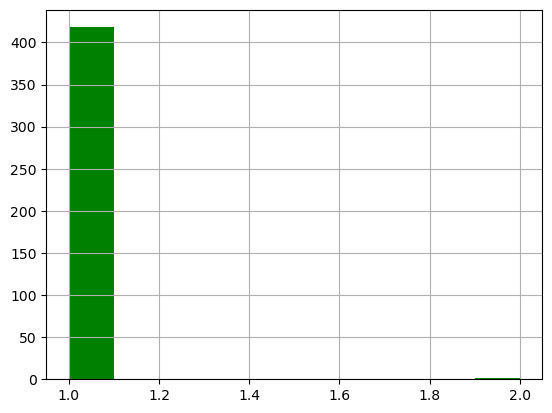

In [28]:
stations_1['upa'].hist(color='green')

<AxesSubplot: >

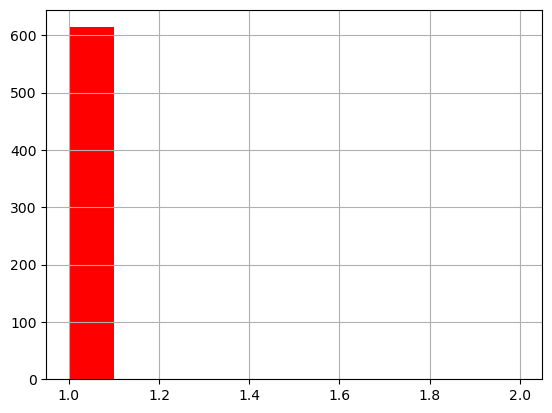

In [29]:
stations_2['upa'].hist(color='red')

<AxesSubplot: >

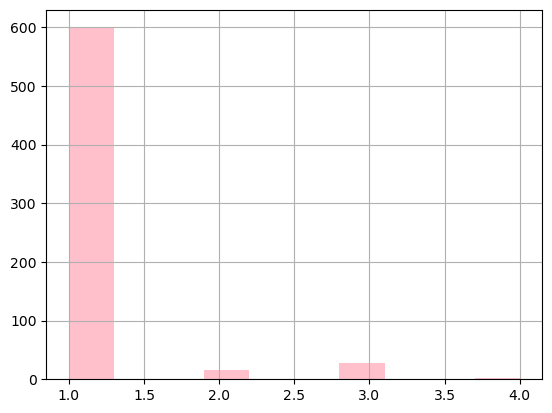

In [30]:
stations_3['upa'].hist(color='pink')

<AxesSubplot: >

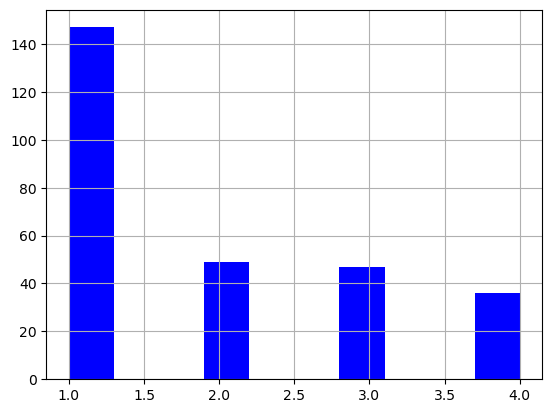

In [31]:
stations_4['upa'].hist(color='blue')

In [38]:
agg = stations_gdf.groupby(['group_number', 'land_use'])

In [39]:
count = agg.count()['station_cd']
count.columns = ['count']

In [40]:
table = pd.pivot_table(stations_gdf, index='group_number', columns='land_use', aggfunc=len)

In [41]:
table['address']

land_use,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0
group_number,,,,,,,,,,,,
1,7.0,NaN,12.0,2.0,33.0,4.0,3.0,90.0,253.0,14.0,NaN,NaN
2,16.0,3.0,12.0,2.0,69.0,14.0,5.0,119.0,340.0,32.0,3.0,NaN
3,17.0,1.0,20.0,5.0,103.0,13.0,4.0,131.0,266.0,53.0,10.0,5.0
4,10.0,1.0,6.0,3.0,51.0,7.0,NaN,42.0,32.0,27.0,7.0,8.0


In [42]:
sns.heatmap(stations_gdf[columns], values='station_cd', index='group_number', columns='land_use', square=True, vmax=100, vmin=-1, center=0)
#plt.savefig('./land_use_by_cluster_heatmap.png')

NameError: name 'columns' is not defined

<AxesSubplot: xlabel='land_use', ylabel='group_number'>

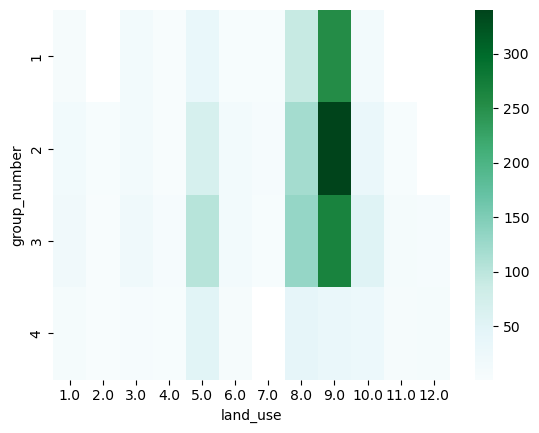

In [43]:
sns.heatmap(table['address'], cmap='BuGn')
#plt.savefig('./land_use_by_cluster_heatmap.png')

<AxesSubplot: >

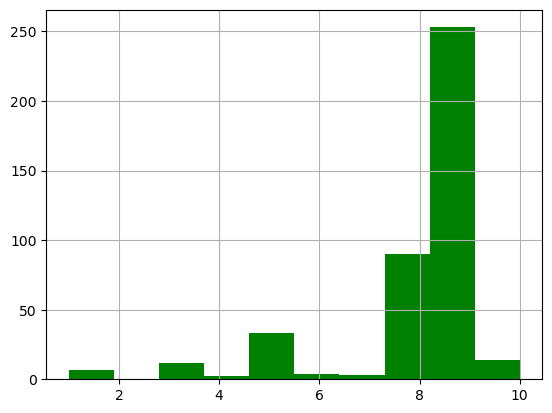

In [44]:
stations_gdf[stations_gdf['group_number'] == 1]['land_use'].hist(color='green')

<AxesSubplot: >

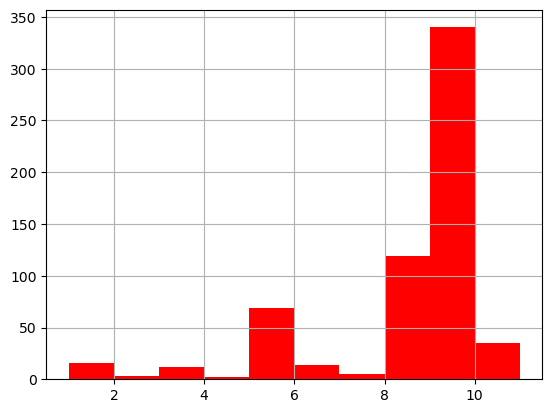

In [45]:
stations_gdf[stations_gdf['group_number'] == 2]['land_use'].hist(color='red')

<AxesSubplot: >

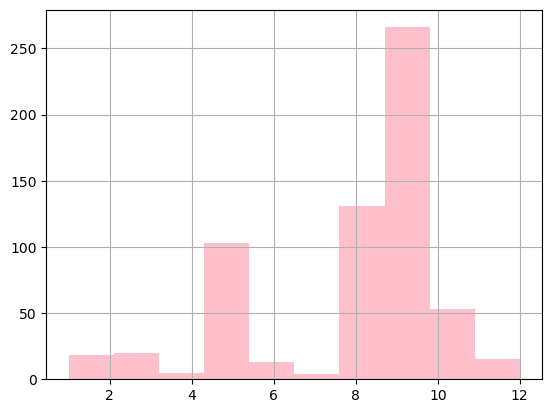

In [46]:
stations_gdf[stations_gdf['group_number'] == 3]['land_use'].hist(color='pink')

<AxesSubplot: >

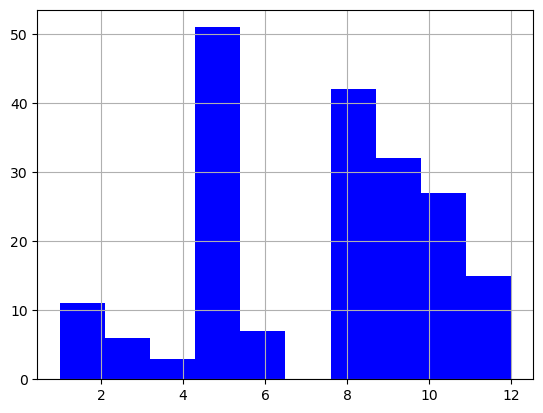

In [47]:
stations_gdf[stations_gdf['group_number'] == 4]['land_use'].hist(color='blue')